In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly as py
import plotly.graph_objs as go
from plotly.offline import plot



In [2]:
df=pd.read_csv("C:\\Users\\abhin\\Downloads\\archive (11)\\housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
train=x_train.join(y_train)
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3751,-118.38,34.18,24.0,1983.0,651.0,2251.0,574.0,2.4792,<1H OCEAN,200000.0
13695,-117.22,34.13,10.0,5951.0,1330.0,3204.0,1159.0,2.7011,INLAND,110200.0
7834,-118.16,33.91,35.0,1403.0,338.0,1415.0,367.0,3.0967,<1H OCEAN,144000.0
5109,-118.31,33.96,43.0,2149.0,493.0,1316.0,462.0,1.5280,<1H OCEAN,131800.0
4837,-118.29,34.03,42.0,1680.0,557.0,2099.0,526.0,1.9167,<1H OCEAN,136400.0
...,...,...,...,...,...,...,...,...,...,...
17099,-122.24,37.46,36.0,4686.0,781.0,2254.0,845.0,6.1043,NEAR OCEAN,343500.0
13900,-116.51,34.45,21.0,8502.0,2634.0,2330.0,991.0,1.3811,INLAND,51300.0
4011,-118.59,34.17,36.0,1887.0,359.0,761.0,329.0,5.4847,<1H OCEAN,296000.0
12934,-121.24,38.66,14.0,3335.0,440.0,1329.0,429.0,6.2082,INLAND,250300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

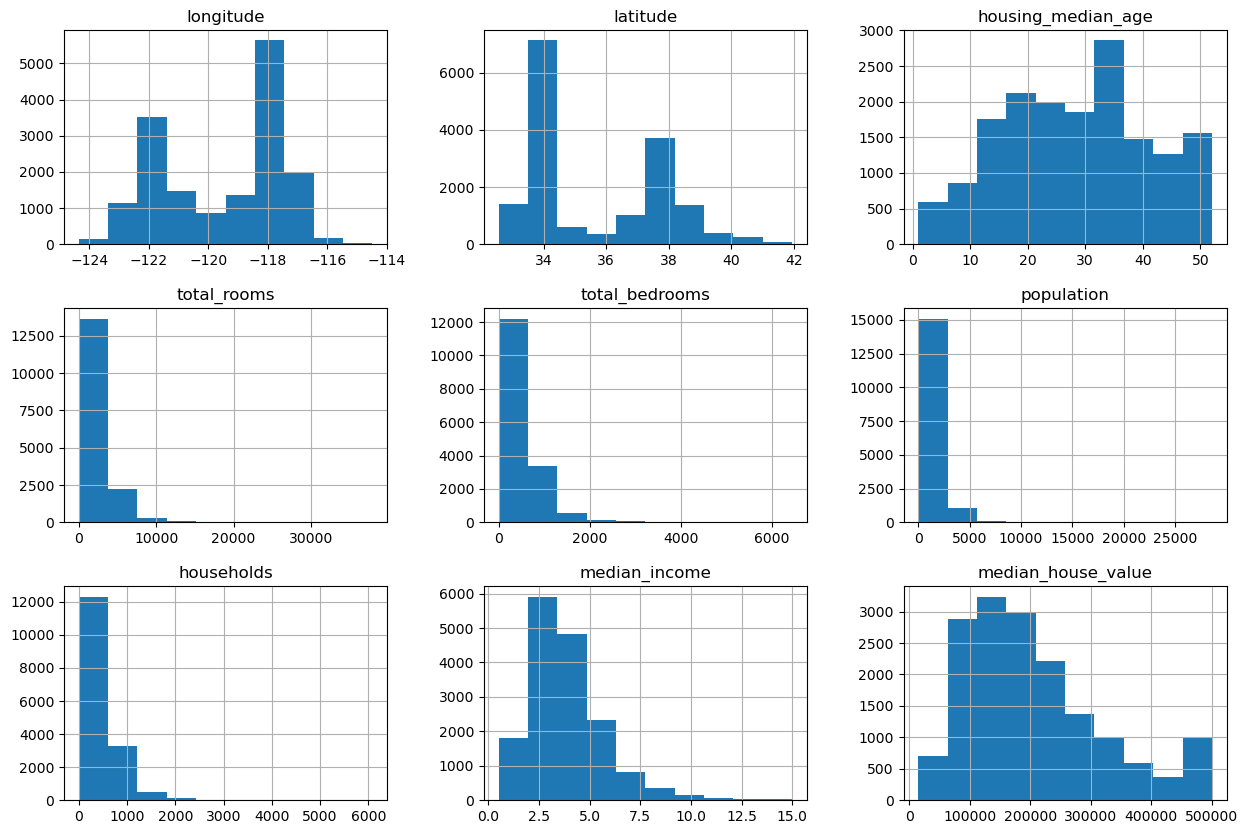

In [10]:
train.hist(figsize=(15,10))

In [11]:
train['total_rooms']=np.log(train['total_rooms']+1)
train['total_bedrooms']=np.log(train['total_bedrooms']+1)
train['population']=np.log(train['population']+1)
train['households']=np.log(train['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

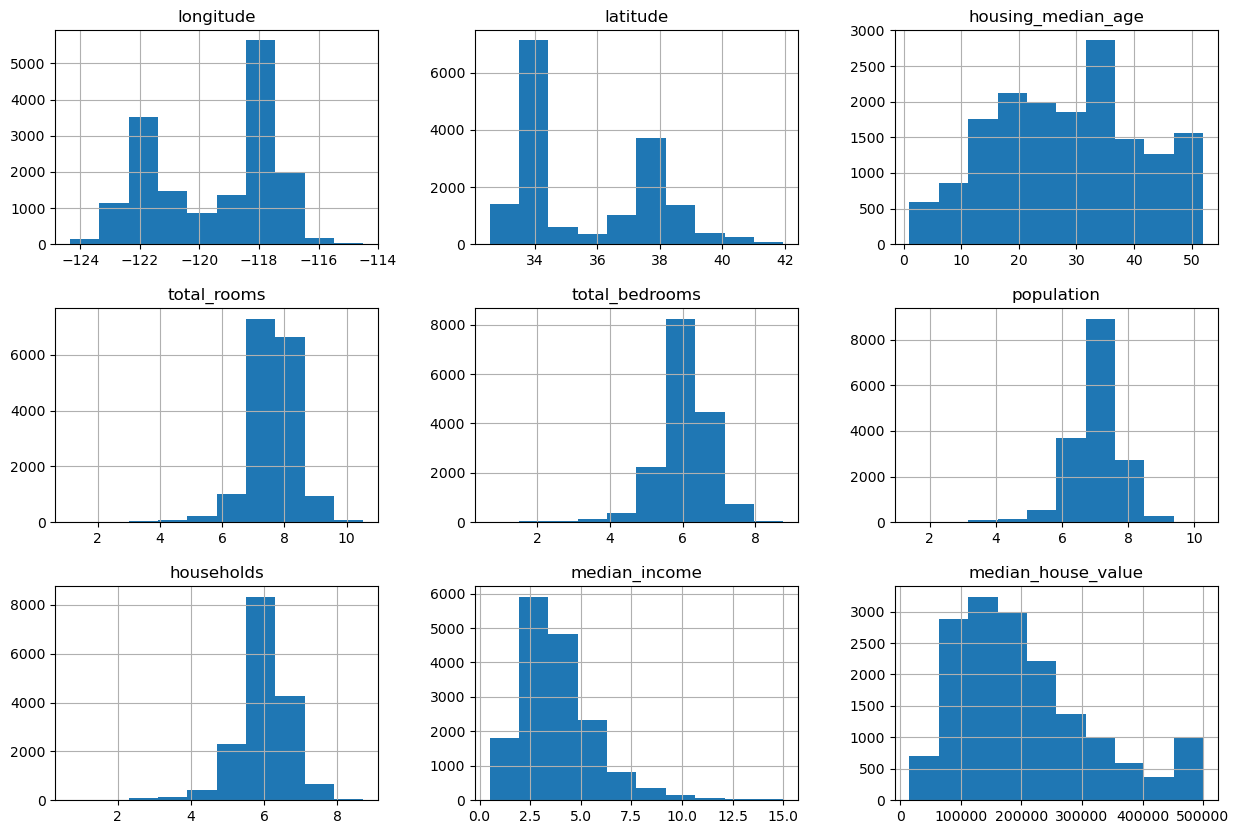

In [12]:
train.hist(figsize=(15,10))

In [13]:
train.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7211
INLAND        5218
NEAR OCEAN    2092
NEAR BAY      1820
ISLAND           5
Name: count, dtype: int64

In [14]:
train = train.join(pd.get_dummies(train['ocean_proximity'], prefix='ocean_proximity')).drop(['ocean_proximity'], axis=1)


In [15]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3751,-118.38,34.18,24.0,7.592870,6.480045,7.719574,6.354370,2.4792,200000.0,True,False,False,False,False
13695,-117.22,34.13,10.0,8.691483,7.193686,8.072467,7.056175,2.7011,110200.0,False,True,False,False,False
7834,-118.16,33.91,35.0,7.247081,5.826000,7.255591,5.908083,3.0967,144000.0,True,False,False,False,False
5109,-118.31,33.96,43.0,7.673223,6.202536,7.183112,6.137727,1.5280,131800.0,True,False,False,False,False
4837,-118.29,34.03,42.0,7.427144,6.324359,7.649693,6.267201,1.9167,136400.0,True,False,False,False,False


<Axes: xlabel='latitude', ylabel='longitude'>

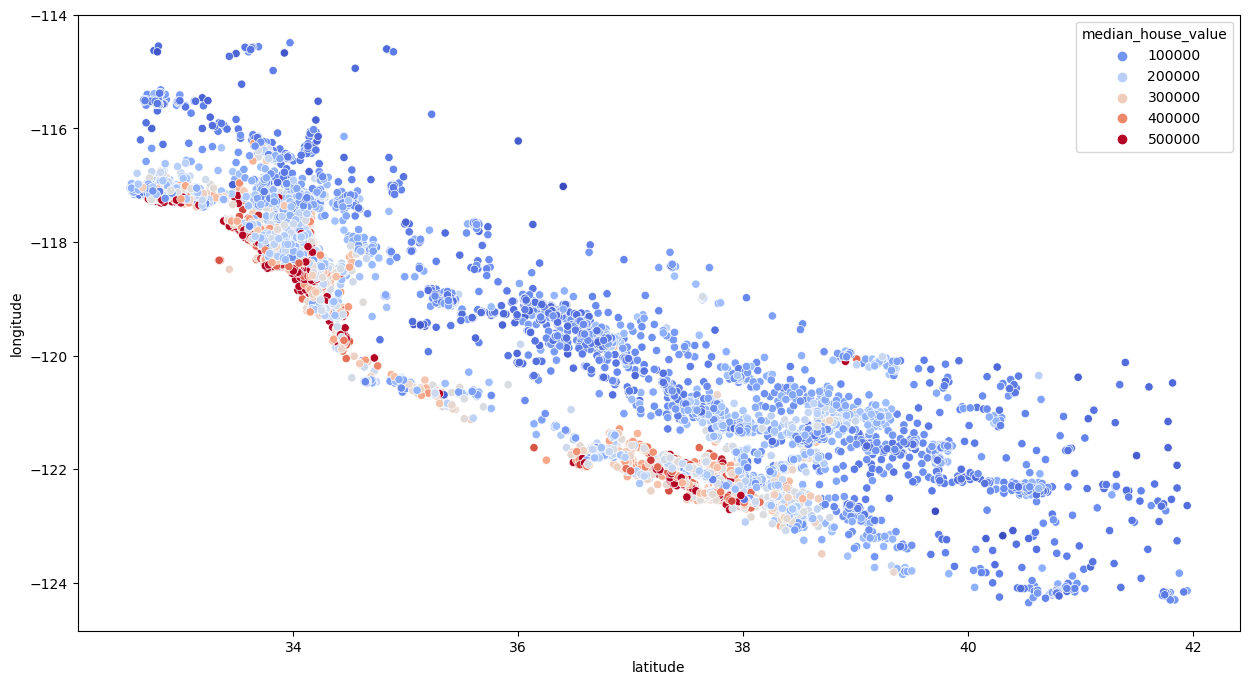

In [16]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train,hue='median_house_value',palette="coolwarm")

In [17]:
train['bedroom_ratio']=train['total_bedrooms']/train['total_rooms']
train['household_rooms']=train['total_rooms']/train['households']
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,household_rooms
3751,-118.38,34.18,24.0,7.592870,6.480045,7.719574,6.354370,2.4792,200000.0,True,False,False,False,False,0.853438,1.194905
13695,-117.22,34.13,10.0,8.691483,7.193686,8.072467,7.056175,2.7011,110200.0,False,True,False,False,False,0.827671,1.231755
7834,-118.16,33.91,35.0,7.247081,5.826000,7.255591,5.908083,3.0967,144000.0,True,False,False,False,False,0.803910,1.226638
5109,-118.31,33.96,43.0,7.673223,6.202536,7.183112,6.137727,1.5280,131800.0,True,False,False,False,False,0.808335,1.250173
4837,-118.29,34.03,42.0,7.427144,6.324359,7.649693,6.267201,1.9167,136400.0,True,False,False,False,False,0.851520,1.185082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,-122.24,37.46,36.0,8.452548,6.661855,7.720905,6.740519,6.1043,343500.0,False,False,False,False,True,0.788148,1.253991
13900,-116.51,34.45,21.0,9.048174,7.876638,7.754053,6.899723,1.3811,51300.0,False,True,False,False,False,0.870522,1.311382
4011,-118.59,34.17,36.0,7.543273,5.886104,6.635947,5.799093,5.4847,296000.0,True,False,False,False,False,0.780312,1.300768
12934,-121.24,38.66,14.0,8.112528,6.089045,7.192934,6.063785,6.2082,250300.0,False,True,False,False,False,0.750573,1.337865


In [18]:
train[['bedroom_ratio', 'household_rooms']].head()


,bedroom_ratio,household_rooms
3751,0.853438,1.194905
13695,0.827671,1.231755
7834,0.803910,1.226638
5109,0.808335,1.250173
4837,0.851520,1.185082


<Axes: >

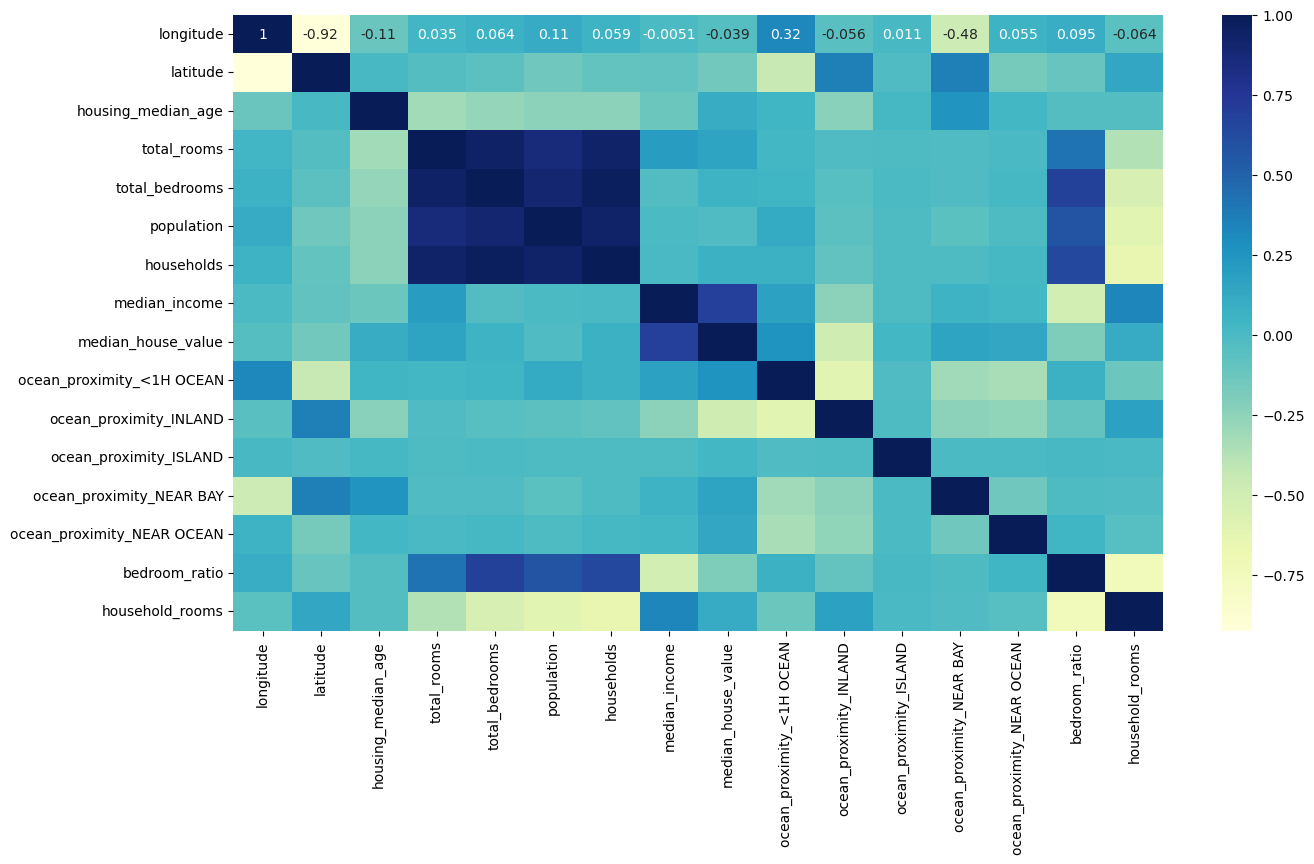

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")

In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
from sklearn.linear_model import LinearRegression
x_train=train.drop(['median_house_value'],axis=1)
y_train=train['median_house_value']
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
#score=lr.score(x_test,y_test)
#score

In [23]:
test=x_test.join(y_test)

test['total_rooms']=np.log(test['total_rooms']+1)
test['total_bedrooms']=np.log(test['total_bedrooms']+1)
test['population']=np.log(test['population']+1)
test['households']=np.log(test['households']+1)

test = test.join(pd.get_dummies(test['ocean_proximity'], prefix='ocean_proximity')).drop(['ocean_proximity'], axis=1)

test['bedroom_ratio']=test['total_bedrooms']/test['total_rooms']
test['household_rooms']=test['total_rooms']/test['households']

x_test=test.drop(['median_house_value'],axis=1)
y_test=test['median_house_value']

In [25]:
score=lr.score(x_train,y_train)





score

0.6732481217104915

### Random Forest Regression

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [27]:

rfr.score(x_train,y_train)

0.9746673816519326

In [28]:
from sklearn.linear_model import LogisticRegression
x_train=train.drop(['median_house_value'],axis=1)
y_train=train['median_house_value']

In [29]:
lm=LogisticRegression()
lm.fit(x_train,y_train)

C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [30]:
lm.score(x_train,y_train)

0.04906399119050532

In [31]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [33]:
dtr.score(x_train,y_train)

1.0

In [ ]:
pip install GradientBoostingRegressor

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor,ExtraTreesRegressor
from sklearn.svm import SVR

In [35]:
knc = KNeighborsRegressor()
rfr=RandomForestRegressor()
dtc = DecisionTreeRegressor(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
abc = AdaBoostRegressor(n_estimators=50, random_state=2)
bc = BaggingRegressor(n_estimators=50, random_state=2)
svr=SVR(kernel='sigmoid',gamma=1.0)
etr=ExtraTreesRegressor(n_estimators=50,random_state=2)
lr=LinearRegression()

In [36]:
clfs = {
    'K Nearest Neighbour Regressor' : knc, 
    'Decision Tree Regressor': dtc, 
    'Linear Regression': lr,
    'Logistic Regression': lrc,  
    'AdaBoost Regressor': abc, 
    'Bagging Regressor': bc,
    'SVR':svr,
    'Random Forest Regressor':rfr,
    'ExtraTreesRegressor':etr
    }

In [37]:
#from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf, x_train, y_train):
    clf.fit(x_train, y_train)
    score=clf.score(x_train,y_train)
    return score

In [38]:
#accuracy_scores = []
precision_scores = []
#
for name,clf in clfs.items():
    
    precision=train_classifier(clf, x_train, y_train )
    
    print("For ",name)
   
    print("Precision - ",precision)
    
   
    precision_scores.append(precision)

For  K Nearest Neighbour Regressor
Precision -  0.788432576801901
For  Decision Tree Regressor
Precision -  0.6462279161103094
For  Linear Regression
Precision -  0.6732481217104915


C:\Users\abhin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



For  Logistic Regression
Precision -  0.05206166646274318
For  AdaBoost Regressor
Precision -  0.4561095222113235
For  Bagging Regressor
Precision -  0.9733614895923299
For  SVR
Precision -  -0.055525905244095286
For  Random Forest Regressor
Precision -  0.9747112704361295
For  ExtraTreesRegressor
Precision -  1.0


In [39]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df


,Algorithm,Precision
8,ExtraTreesRegressor,1.000000
7,Random Forest Regressor,0.974711
5,Bagging Regressor,0.973361
0,K Nearest Neighbour Regressor,0.788433
2,Linear Regression,0.673248
1,Decision Tree Regressor,0.646228
4,AdaBoost Regressor,0.456110
3,Logistic Regression,0.052062
6,SVR,-0.055526


In [40]:
import pickle

with open("house_price_.pkl", "wb") as file:
    pickle.dump(etr, file)


In [56]:
latitude = float(input("Enter latitude[30,42]: "))
longitude = float(input("Enter longitude[-124,-110]: "))
housing_median_age = float(input("Enter house median age[0.52]: "))
total_rooms = float(input("Enter total rooms[1,10]: "))
total_bedrooms = float(input("Enter total bedrooms[0,10]: "))
population = float(input("Enter population[0,10]: "))
households = float(input("Enter households[0,10]: "))
median_income = float(input("Enter median income[0,15]: "))
ocean_proximity = input("Enter ocean proximity (1 for <1H OCEAN, 2 for INLAND, 3 for ISLAND, 4 for NEAR BAY, 5 for NEAR OCEAN): ")
bedroom_ratio = float(total_bedrooms) / float(total_rooms)
household_rooms = float(total_rooms) / float(households)

input_data = pd.DataFrame({  
    'longitude': [longitude],
    'latitude': [latitude],
    'housing_median_age': [housing_median_age],
    'total_rooms': [total_rooms],
    'total_bedrooms': [total_bedrooms],
    'population': [population],
    'households': [households],
    'median_income': [median_income],
    'ocean_proximity_<1H OCEAN': [1 if ocean_proximity == '1' else 0],
    'ocean_proximity_INLAND': [1 if ocean_proximity == '2' else 0],
    'ocean_proximity_ISLAND': [1 if ocean_proximity == '3' else 0],
    'ocean_proximity_NEAR BAY': [1 if ocean_proximity == '4' else 0],
    'ocean_proximity_NEAR OCEAN': [1 if ocean_proximity == '5' else 0],
    'bedroom_ratio':[bedroom_ratio],
    'household_rooms':[household_rooms]
})
predicted_price = etr.predict(input_data)
print(f"The predicted price of the house is: ${predicted_price}")

Enter latitude[30,42]:  32
Enter longitude[-124,-110]:  -119
Enter house median age[0.52]:  45
Enter total rooms[1,10]:  6
Enter total bedrooms[0,10]:  3
Enter population[0,10]:  5
Enter households[0,10]:  7
Enter median income[0,15]:  7
Enter ocean proximity (1 for <1H OCEAN, 2 for INLAND, 3 for ISLAND, 4 for NEAR BAY, 5 for NEAR OCEAN):  1


The predicted price of the house is: $[372908.4]


In [52]:
print(train['latitude'].min())
train['latitude'].max()


32.55


41.95

In [53]:
print(train['longitude'].min())
train['longitude'].max()


-124.35


-114.49

In [54]:
print(train['housing_median_age'].min())
train['housing_median_age'].max()


1.0


52.0

In [55]:
print(train['total_rooms'].min())
train['total_rooms'].max()


1.0986122886681098


10.543708527286668

In [47]:
df['total_rooms'].min()

2.0

In [48]:
df['total_rooms'].max()

39320.0

In [49]:
df['total_bedrooms'].max()

6445.0

In [50]:
df['median_income'].min()

0.4999